In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (8).json


{'kaggle.json': b'{"username":"rezaseidgar","key":"87df51df3f17e77c3e0b2e4a2b031614"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

mobile-price-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

'kaggle (1).json'  'kaggle (6).json'		      sample_data
'kaggle (2).json'  'kaggle (7).json'		      test.csv
'kaggle (3).json'  'kaggle (8).json'		      train.csv
'kaggle (4).json'   kaggle.json
'kaggle (5).json'   mobile-price-classification.zip


In [ ]:
!unzip '/content/mobile-price-classification.zip' -d '/content/'

Archive:  /content/mobile-price-classification.zip
replace /content/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data = pd.read_csv('/content/train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
for col in data.columns :
  if data[col].dtype == 'int64' or data[col].dtype == 'float64':
    up = data[col].mean() + 3*data[col].std()
    low = data[col].mean() - 3*data[col].std()
    mask = (data[col] > up ) | (data[col] < low )
    data = data.drop(data[mask].index)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1988 non-null   int64  
 1   blue           1988 non-null   int64  
 2   clock_speed    1988 non-null   float64
 3   dual_sim       1988 non-null   int64  
 4   fc             1988 non-null   int64  
 5   four_g         1988 non-null   int64  
 6   int_memory     1988 non-null   int64  
 7   m_dep          1988 non-null   float64
 8   mobile_wt      1988 non-null   int64  
 9   n_cores        1988 non-null   int64  
 10  pc             1988 non-null   int64  
 11  px_height      1988 non-null   int64  
 12  px_width       1988 non-null   int64  
 13  ram            1988 non-null   int64  
 14  sc_h           1988 non-null   int64  
 15  sc_w           1988 non-null   int64  
 16  talk_time      1988 non-null   int64  
 17  three_g        1988 non-null   int64  
 18  touch_sc

In [ ]:
y = data['price_range']

In [ ]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [ ]:
for col in data.columns :
  if (data[col].dtype == 'int64' or data[col].dtype == 'float64') and (col !='price_range'):
    data[col] = (data[col] - min(data[col])) /(max(data[col]) - min(data[col]))

In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.058824,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.117647,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.764706,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1


In [ ]:
print(data.shape)
print(y.shape)

(1988, 21)
(1988,)


In [ ]:
cor_matrix = data.corr()

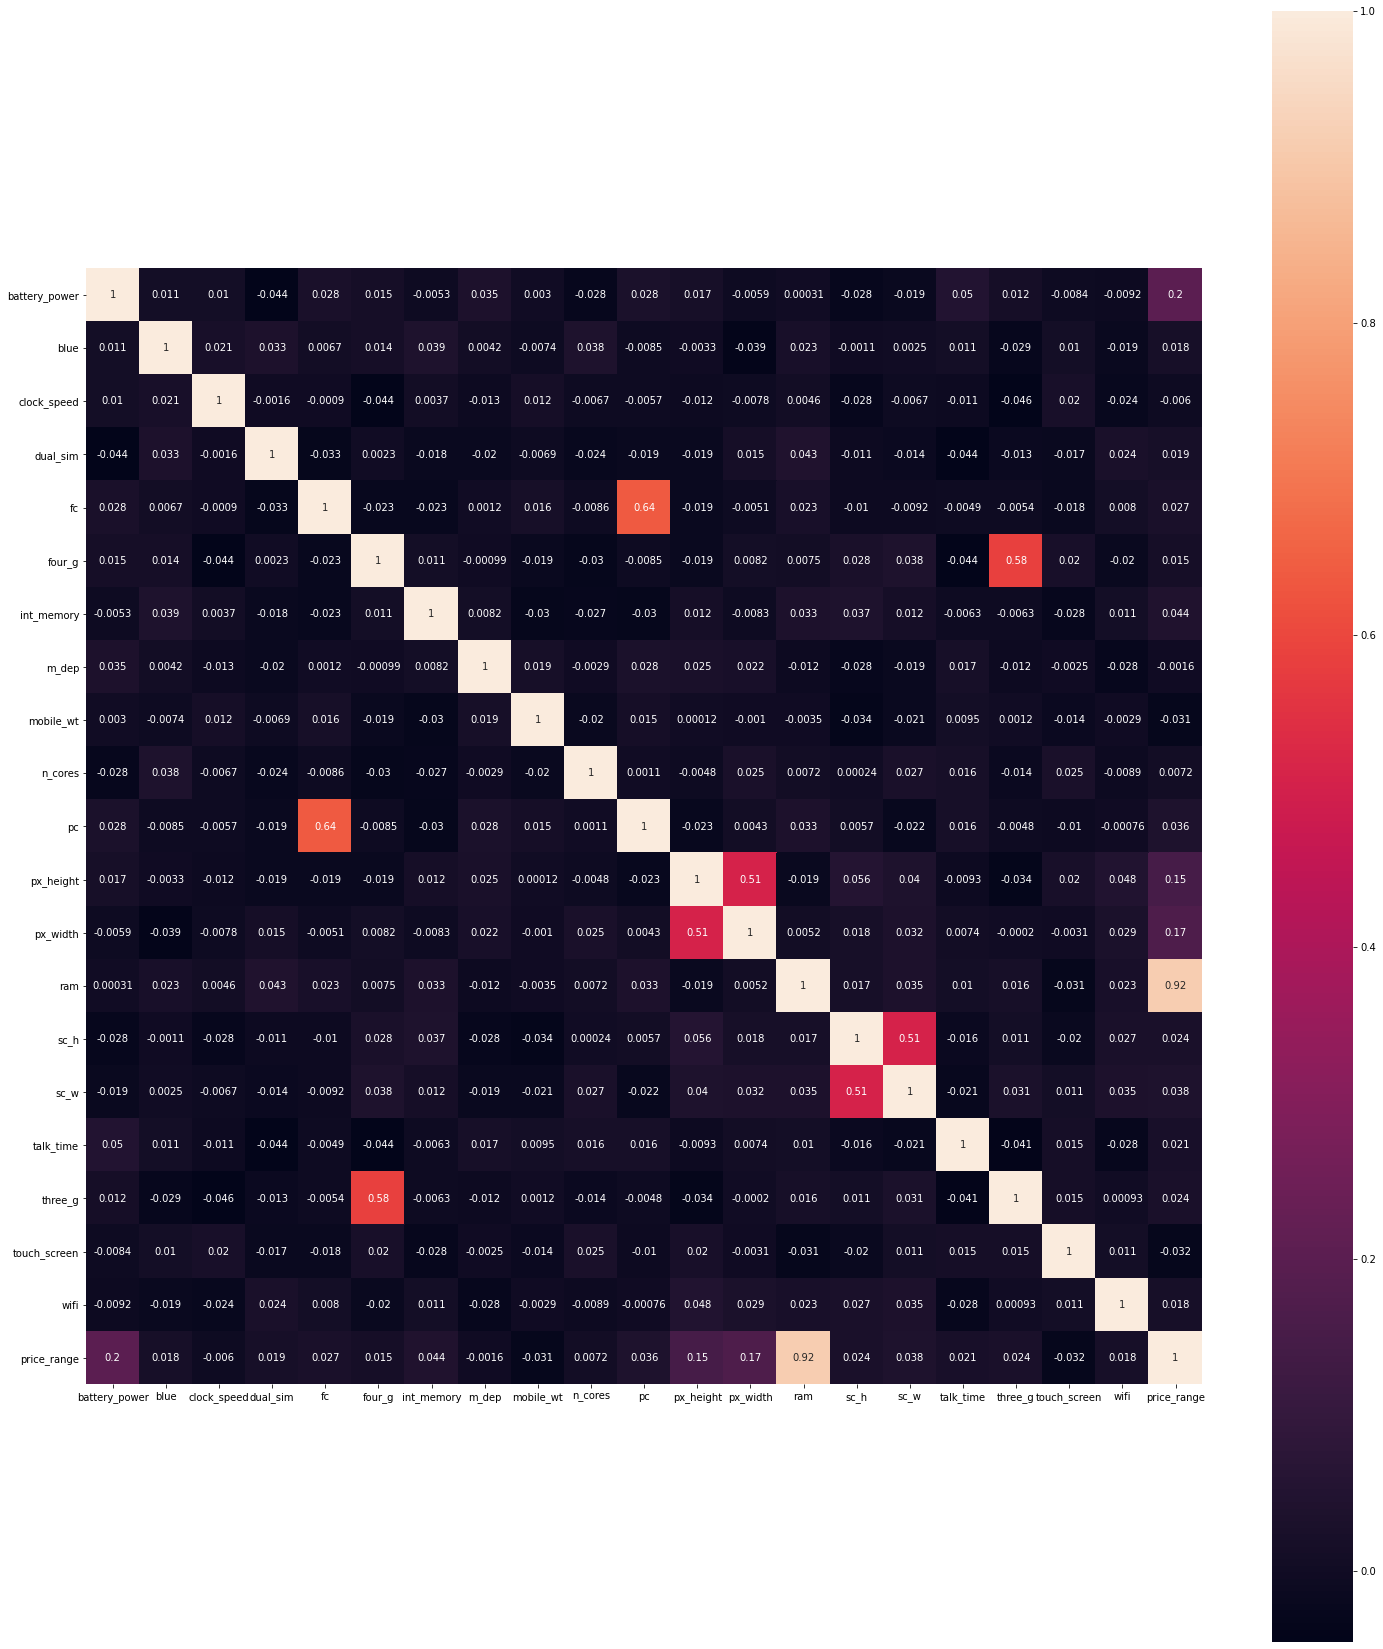

In [ ]:
f , ax = plt.subplots(figsize=(25,30))
sns.heatmap(cor_matrix,square=True,annot=True)

In [ ]:
x = data.drop(columns=['price_range'])
print(x.shape)
print(y.shape)

(1988, 20)
(1988,)


In [ ]:
## Second part

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.8375209380234506

In [ ]:
y_pred = svm.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[147  18   0   0]
 [ 10 121  14   0]
 [  0  23 111  14]
 [  0   0  18 121]]


In [ ]:
## Third part

In [ ]:
svm = SVC(kernel='linear')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.932998324958124

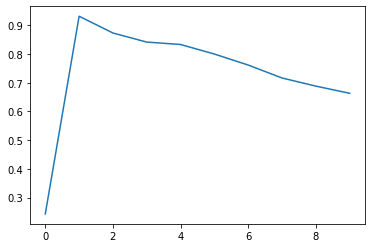

In [ ]:
plotting = []
for i in range(10):
  svm = SVC(kernel='poly',degree=i)
  svm.fit(x_train,y_train)
  plotting.append((svm.score(x_test,y_test)))
plt.plot(plotting)
plt.show()

In [ ]:
svm = SVC(decision_function_shape='ovo')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.8375209380234506

In [ ]:
svm = SVC(gamma='auto')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.8844221105527639

In [ ]:
## 4th part

In [ ]:
## 5 A

In [ ]:
dataall5 = pd.read_csv('/content/train.csv')
dataall5.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
min(dataall5['battery_power'])

501

In [ ]:
max(dataall5['battery_power'])

1998

In [ ]:
bins = [500,875.25,1249.5,1623.75,1999]

In [ ]:
group_name = ['bad','medium','good','nice']

In [ ]:
dataall5['quality of battery'] = pd.cut(dataall5['battery_power'],bins,labels=group_name)

In [ ]:
## 5 B

In [ ]:
cate_features = []
cate_features.append('quality of battery')
cate_features

['quality of battery']

In [ ]:
dum_features = pd.get_dummies(dataall5[cate_features])
dum_features.head()

,quality of battery_bad,quality of battery_medium,quality of battery_good,quality of battery_nice
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,1


In [ ]:
dataall5 = pd.concat([dataall5,dum_features],axis=1)
dataall5.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,quality of battery,quality of battery_bad,quality of battery_medium,quality of battery_good,quality of battery_nice
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,bad,1,0,0,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,medium,0,1,0,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,bad,1,0,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,bad,1,0,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,nice,0,0,0,1


In [ ]:
dataall5 = dataall5.drop(columns=cate_features)
dataall5.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,quality of battery_bad,quality of battery_medium,quality of battery_good,quality of battery_nice
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,1,0,0,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,0,1,0,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,1,0,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,1,0,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,0,0,0,1


In [ ]:
## 5 C

In [ ]:
data5C = pd.read_csv('/content/train.csv')
data5C.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
datalog = data5C.transform(np.log)
datalog.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,6.735780,-inf,0.788457,-inf,0.000000,-inf,1.945910,-0.510826,5.236442,0.693147,0.693147,2.995732,6.628041,7.843456,2.197225,1.945910,2.944439,-inf,-inf,0.0,0.000000
1,6.928538,0.0,-0.693147,0.0,-inf,0.0,3.970292,-0.356675,4.912655,1.098612,1.791759,6.807935,7.594884,7.875119,2.833213,1.098612,1.945910,0.0,0.0,-inf,0.693147
2,6.333280,0.0,-0.693147,0.0,0.693147,0.0,3.713572,-0.105361,4.976734,1.609438,1.791759,7.141245,7.447751,7.864420,2.397895,0.693147,2.197225,0.0,0.0,-inf,0.693147
3,6.421622,0.0,0.916291,-inf,-inf,-inf,2.302585,-0.223144,4.875197,1.791759,2.197225,7.103322,7.487734,7.926242,2.772589,2.079442,2.397895,0.0,-inf,-inf,0.693147
4,7.507141,0.0,0.182322,-inf,2.564949,0.0,3.784190,-0.510826,4.948760,0.693147,2.639057,7.096721,7.100027,7.252054,2.079442,0.693147,2.708050,0.0,0.0,-inf,0.000000


In [ ]:
dataexp = data5C.transform(np.exp)
dataexp.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,inf,1.000000,9.025013,1.000000,2.718282,1.000000,1.096633e+03,1.822119,4.439792e+81,7.389056,7.389056e+00,4.851652e+08,inf,inf,8.103084e+03,1096.633158,1.784823e+08,1.000000,1.000000,2.718282,2.718282
1,inf,2.718282,1.648721,2.718282,1.000000,2.718282,1.041376e+23,2.013753,1.158910e+59,20.085537,4.034288e+02,inf,inf,inf,2.415495e+07,20.085537,1.096633e+03,2.718282,2.718282,1.000000,7.389056
2,3.219536e+244,2.718282,1.648721,2.718282,7.389056,2.718282,6.398435e+17,2.459603,9.390741e+62,148.413159,4.034288e+02,inf,inf,inf,5.987414e+04,7.389056,8.103084e+03,2.718282,2.718282,1.000000,7.389056
3,1.233407e+267,2.718282,12.182494,1.000000,1.000000,1.000000,2.202647e+04,2.225541,7.808671e+56,403.428793,8.103084e+03,inf,inf,inf,8.886111e+06,2980.957987,5.987414e+04,2.718282,1.000000,1.000000,7.389056
4,inf,2.718282,3.320117,1.000000,442413.392009,2.718282,1.285160e+19,1.822119,1.719974e+61,7.389056,1.202604e+06,inf,inf,inf,2.980958e+03,7.389056,3.269017e+06,2.718282,2.718282,1.000000,2.718282


In [ ]:
## 5 D

In [ ]:
data5D = pd.read_csv('/content/train.csv')
data5D.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data5D['Area'] = data5D['px_height']* data5D['px_width']

In [ ]:
dataall5['Area'] = dataall5['px_height']* dataall5['px_width']

In [ ]:
data5D.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Area
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1464096


In [ ]:
dataall5.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,quality of battery_bad,quality of battery_medium,quality of battery_good,quality of battery_nice,Area,quality of battery_bad,quality of battery_medium,quality of battery_good,quality of battery_nice,quality of battery_bad,quality of battery_medium,quality of battery_good,quality of battery_nice
0,0.227789,0.0,0.68,0.0,0.058824,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1,0,0,0,0,0.001744,0,0,0,0,0,0,0,0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2,0,0,0,0,0.458652,0,0,0,0,0,0,0,0
2,0.041416,1.0,0.00,1.0,0.117647,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2,0,0,0,0,0.523081,0,0,0,0,0,0,0,0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2,0,0,0,0,0.532607,0,0,0,0,0,0,0,0
4,0.881764,1.0,0.28,0.0,0.764706,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1,0,0,0,0,0.292940,0,0,0,0,0,0,0,0


In [ ]:
## 6th part

In [ ]:
for col in data5D.columns :
  if (data5D[col].dtype == 'int64' or data5D[col].dtype == 'float64') and (col !='price_range'):
    data5D[col] = (data5D[col] - min(data5D[col])) /(max(data5D[col]) - min(data5D[col]))

In [ ]:
x = data5D.drop(columns=['price_range'])
y = data5D['price_range']

In [ ]:
data5D.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Area
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1,0.003891
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2,0.462943
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2,0.557678
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2,0.558828
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1,0.376732


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.8466666666666667

In [ ]:
for col in dataall5.columns :
  if (dataall5[col].dtype == 'int64' or dataall5[col].dtype == 'float64') and (col !='price_range'):
    dataall5[col] = (dataall5[col] - min(dataall5[col])) /(max(dataall5[col]) - min(dataall5[col]))

In [ ]:
x = dataall5.drop(columns=['price_range'])
y = dataall5['price_range']

In [ ]:
dataall5.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,quality of battery_bad,quality of battery_medium,quality of battery_good,quality of battery_nice
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1,1,0,0,0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2,0,1,0,0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2,1,0,0,0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2,1,0,0,0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1,0,0,0,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.815

In [ ]:
## 8th part

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train,y_train)
print(dtc.score(x_test,y_test))

0.8166666666666667


In [ ]:
## 9th part

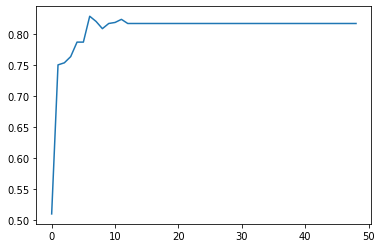

In [ ]:
plotting= []
for i in range(1,50,1):
  dtc = DecisionTreeClassifier(max_depth=i,random_state=42)
  dtc.fit(x_train,y_train)
  plotting.append((dtc.score(x_test,y_test)))
plt.plot(plotting)
plt.show()

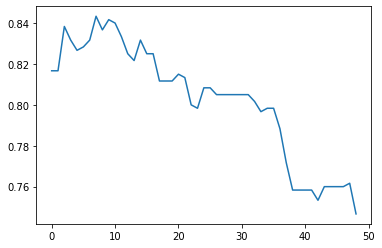

In [ ]:
plotting= []
for i in range(1,50,1):
  dtc = DecisionTreeClassifier(min_samples_leaf=i,random_state=42)
  dtc.fit(x_train,y_train)
  plotting.append(dtc.score(x_test,y_test))
plt.plot(plotting)

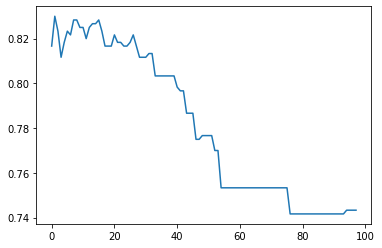

In [ ]:
plotting = []
for i in range(2,100,1):
  dtc = DecisionTreeClassifier(min_samples_split=i,random_state=42)
  dtc.fit(x_train,y_train)
  plotting.append((dtc.score(x_test,y_test)))
plt.plot(plotting)

In [ ]:
min(plotting)
k = 0
for i in plotting:
  if i == max(plotting):
    print(k)
    break
  k = k+1

1


In [ ]:
min(plotting)

0.7416666666666667

In [ ]:
max(plotting)


0.83

In [ ]:
## 12th part

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
print(rfc.score(x_test,y_test))

0.87
